## Link Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip the Data File

In [2]:
from zipfile import ZipFile

In [3]:
ref = ZipFile("/content/drive/MyDrive/CV_Assignment/CS67_Fall2022_ A1_Dataset.zip", "r")
ref.extractall(path = 'content')
ref.close()

## Reading train and test Files

In [73]:
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [5]:
## Read all the files of train and test data stored in txt files
trainFiles = []
testFiles = []
folderNameTrain = []
folderNameTest = []
cwd = "/content/content/" # Working directory
for file in os.listdir(cwd): # loop on list of files present in current folder
    if os.path.isdir(os.path.join(cwd, file)): # check if the file returned in list is directory than open it
        try:
            with open (os.path.join(os.path.join(cwd, file),"train.txt"), "r") as myfile: # Read the training files names and append them in list
                data = myfile.read().splitlines()
                trainFiles.extend([os.path.join(os.path.join(cwd, file),filePath) for filePath in data])
                folderNameTrain.extend([int(file)] * len(data)) # Repeat the folder name according to length of data
            with open (os.path.join(os.path.join(cwd, file),"test.txt"), "r") as testfile: # Read the test files names and append them in list
                datatest = testfile.read().splitlines()
                testFiles.extend([os.path.join(os.path.join(cwd, file),filePath) for filePath in datatest])
                folderNameTest.extend([int(file)] * len(datatest))# Repeat the folder name according to length of data
        except FileNotFoundError:
            continue


## Plotting some random images from Training list

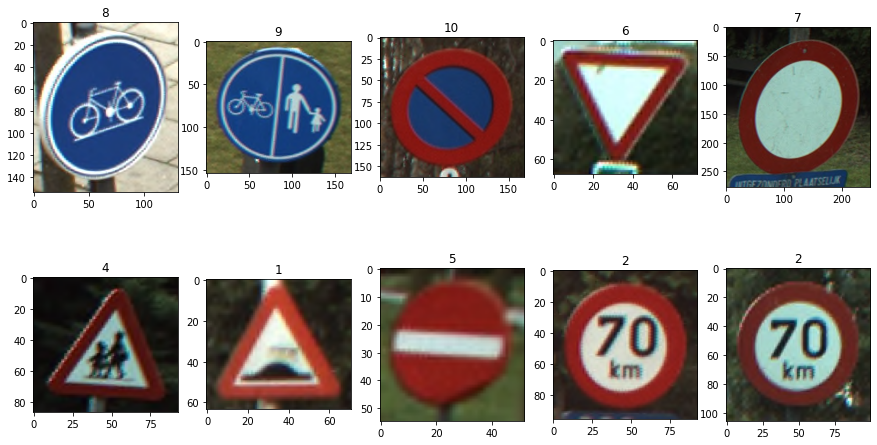

In [6]:
plt.figure(figsize=(15, 8))                        # Set the figure size
for i in range(10):                                # Display 10 images as subplots
    plt.subplot(2, 5, i+1)                         # Create subplots for each image
    rndNumber = random.randint(0, len(trainFiles)) # Generate a random number
    img = plt.imread(trainFiles[rndNumber])
    plt.imshow(img)
    plt.title(folderNameTrain[rndNumber])          # Print the title of image as folder number

## Plotting some random images from Test list

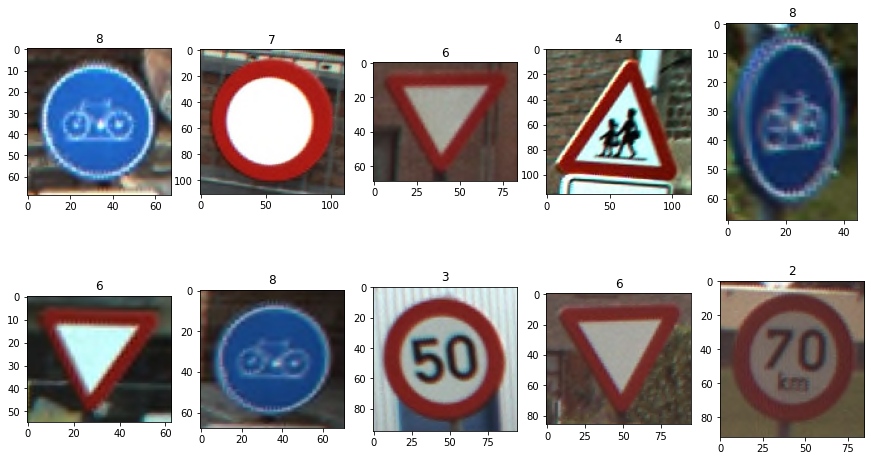

In [7]:
plt.figure(figsize=(15, 8))                        # Set the figure size
for i in range(10):                                # Display 10 images as subplots
    plt.subplot(2, 5, i+1)                         # Create subplots for each image
    rndNumber = random.randint(0, len(testFiles)) # Generate a random number
    img = plt.imread(testFiles[rndNumber])
    plt.imshow(img)
    plt.title(folderNameTest[rndNumber])          # Print the title of image as folder number

# Method 1: Using HoG for features 

In [8]:
from skimage.feature import hog # import HoG feature extractor from skimage
from skimage import exposure
from tqdm import tqdm # Import tqdm to display progress bar

In [9]:
# Count training Images 
lenTrainImages = len(trainFiles)

# Create an empty list to store the hog feature vector
trainData = []

# Define a function to compute HoG from given image
def computeHOG(image):
    """Input Parameters: Image
    Output: HOG featues"""
    image = cv2.resize(image, (100, 100))
    (h, hogImage) = hog(image, orientations = 3,
                      pixels_per_cell  = (2, 2), cells_per_block  = (2, 2), transform_sqrt=True,
                      block_norm  = 'L1' , visualize=True)
    return (h, hogImage)

# Loop over the images
for imgPath in tqdm(trainFiles):
    hVector, hogImage = computeHOG(plt.imread(imgPath))
    trainData.append(hVector.tolist()) # append the hog vector into training data list

100%|██████████| 800/800 [02:23<00:00,  5.59it/s]


## Visualizing example of computed HoG

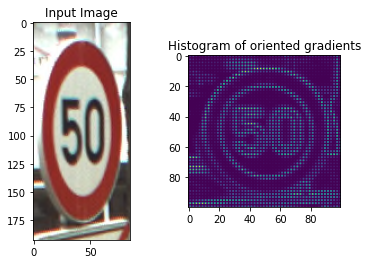

In [10]:
plt.subplot(1, 2, 1)
plt.imshow(plt.imread(trainFiles[-1]))
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(hogImage)
plt.title('Histogram of oriented gradients')
plt.show()

## Training with SVM classifier

In [ ]:
from sklearn.svm import LinearSVC
import numpy as np

In [ ]:
trainDataArr = np.array(trainData, dtype=object)
print("Shape of train data:", trainDataArr.shape)

Shape of train data: (800, 28812)


In [ ]:
# load linear SVM
modelSVC = LinearSVC(max_iter=3000)
modelSVC.fit(trainData, folderNameTrain)
print("Training completed")

Training completed


## Evaluating on Test Data

In [34]:
# Create an empty list to store the hog feature vector
testData = []

# Define a function to compute HoG from given image
def computeHOG(image):
    """Input Parameters: Image
    Output: HOG featues"""
    image = cv2.resize(image, (100, 100))
    (h, hogImage) = hog(image, orientations = 3,
                      pixels_per_cell  = (2, 2), cells_per_block  = (2, 2), transform_sqrt=True,
                      block_norm  = 'L1' , visualize=True)
    return (h, hogImage)

# Loop over the images
for imgPath in tqdm(testFiles):
    hVector, hogImage = computeHOG(plt.imread(imgPath))
    testData.append(hVector.tolist()) # append the hog vector into training data list

100%|██████████| 200/200 [00:35<00:00,  5.65it/s]


In [ ]:
# Make prediction on test data
predLabels = modelSVC.predict(testData)
print("Done")

Done


### Confusion Matrix

In [ ]:
import pandas as pd

In [ ]:
trueLabels = pd.Series(folderNameTest, name= 'True_Labels')
predLabels = pd.Series(predLabels, name = 'Pred_Labels')
confusionMatrix = pd.crosstab(trueLabels, predLabels, margins=True)
print("Confusion Matrix:\n", confusionMatrix)

Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1            20   0   0   0   0   0   0   0   0   0   20
2             0  20   0   0   0   0   0   0   0   0   20
3             0   0  20   0   0   0   0   0   0   0   20
4             0   0   0  20   0   0   0   0   0   0   20
5             0   0   0   0  20   0   0   0   0   0   20
6             0   0   0   0   0  20   0   0   0   0   20
7             0   0   0   0   0   0  20   0   0   0   20
8             0   0   0   0   0   0   0  20   0   0   20
9             0   0   0   0   0   0   0   0  20   0   20
10            0   0   0   0   0   0   0   0   0  20   20
All          20  20  20  20  20  20  20  20  20  20  200


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(trueLabels, predLabels))
 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Visualizing some predictions

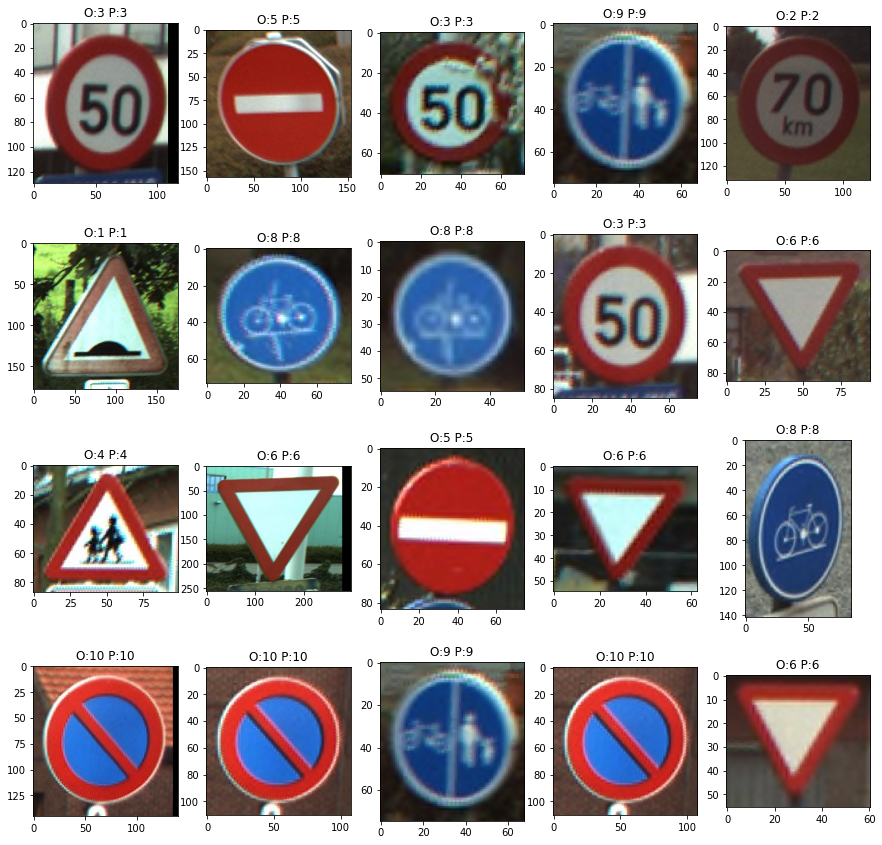

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(20):
    index = random.randint(0, len(testFiles)) # Get a random index
    plt.subplot(4, 5, i+1)
    plt.imshow(plt.imread(testFiles[index]))
    plt.title(f"O:{folderNameTest[index]} P:{predLabels[index]}")

### Save the classifier Model

In [ ]:
import pickle
with open('svcModelHoG.pkl','wb') as f:
    pickle.dump(modelSVC,f)

# SIFT Feature Detector with BOVW

In [ ]:
def calculateSIFTFeatures(img, th):
  """ This function will calculate the SIFT features and return the descriptor vector
  Input Parameters-> image, threshold value: Number of best features to retain"""
  sift = cv2.xfeatures2d.SIFT_create(th)
  _, des = sift.detectAndCompute(img, None)
  return des

def bagOfVisualWords(features, centers, k = 500):
  """Assign the features that are similar to specific cluster to form bag of visual words
  Input Parameters-> Features and centers find from K-Mean"""
  descriptorVector = np.zeros((1, k))
  for i in range(features.shape[0]):
      diff = np.tile(features[i], (k, 1)) - centers
      dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
      distIndex = dist.argsort()
      idx = distIndex[0]
      descriptorVector[0][idx] += 1
  return descriptorVector


def SIFTClassifier(thresh, filePaths):
  SIFTfeatures = [] # The empty list will store the features returned from SIFT
  for filePath in tqdm(filePaths, desc = "Finding SIFT Features"):
    img = cv2.imread(filePath) # Read the file path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Change the color format from BGR 2 RGB
    img_des = calculateSIFTFeatures(img, thresh) # Find the image descriptors
    if img_des is not None:
      SIFTfeatures.append(img_des)
  SIFTfeatures = np.vstack(SIFTfeatures)

  # Find the centers of features by K-Means clustering

  k = 50
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(SIFTfeatures, k, None, criteria, 10, flags)


  # Create Histogram for each image
  bovw = []
  for filePath in tqdm(filePaths, desc = "Reading files"):
    img = cv2.imread(filePath,)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_des = calculateSIFTFeatures(img, thresh)
    if img_des is not None:
      img_vec = bagOfVisualWords(img_des, centres, k)
      bovw.append(img_vec)
  bovw = np.vstack(bovw)
  return bovw

## Using 20% from Train Data to evaluate

In [ ]:
import random

In [ ]:
accuracy = []
for th in range(3,31,3):
  print(f'\nCalculating for a threshold of {th}')
  dataTrain = SIFTClassifier(th, trainFiles)
  
  X_train, X_test, y_train, y_test = train_test_split(dataTrain, folderNameTrain, test_size=0.2)
  clf = SVC()
  clf.fit(X_train, y_train)
  preds = clf.predict(X_test)
  acc = accuracy_score(y_test, preds)
  accuracy.append(acc)
  trueLabels = pd.Series(y_test, name= 'True_Labels')
  predLabels = pd.Series(preds, name = 'Pred_Labels')
  confusionMatrix = pd.crosstab(trueLabels, predLabels, margins=True)
  print("Confusion Matrix:\n", confusionMatrix)
  print("\nClassification Report\n",classification_report(trueLabels, predLabels))


Calculating for a threshold of 3


Reading files: 100%|██████████| 800/800 [00:04<00:00, 172.09it/s]


Confusion Matrix:
 Pred_Labels   1   2   3  4   5   6   7   8   9  10  All
True_Labels                                            
1            12   0   0  1   0   2   1   0   0   4   20
2             2  20   0  0   0   1   0   0   2   1   26
3             1   1  10  0   0   0   1   0   0   3   16
4             3   0   0  6   0   0   2   1   2   0   14
5             0   0   1  0  12   0   0   0   0   0   13
6             2   0   0  1   1   5   2   1   0   1   13
7             0   0   0  0   0   1   3   0   0   6   10
8             0   0   0  0   1   1   2   8   2   2   16
9             0   0   0  0   0   0   0   3  11   1   15
10            2   0   0  1   1   2   2   0   0   9   17
All          22  21  11  9  15  12  13  13  17  27  160

Classification Report
               precision    recall  f1-score   support

           1       0.55      0.60      0.57        20
           2       0.95      0.77      0.85        26
           3       0.91      0.62      0.74        16
           4

Reading files: 100%|██████████| 800/800 [00:04<00:00, 165.91it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1             8   0   0   0   1   4   4   0   0   1   18
2             1  16   0   0   0   0   0   0   0   0   17
3             0   0   9   1   0   0   1   0   0   0   11
4             0   0   1  14   1   2   1   0   0   2   21
5             0   0   0   0   6   1   0   0   0   1    8
6             0   0   0   0   0  11   0   1   0   3   15
7             1   0   0   1   1   2   7   0   1   4   17
8             0   0   1   0   1   0   0  16   0   0   18
9             2   0   0   0   1   0   0   0  18   3   24
10            0   0   0   0   0   2   1   0   0   8   11
All          12  16  11  16  11  22  14  17  19  22  160

Classification Report
               precision    recall  f1-score   support

           1       0.67      0.44      0.53        18
           2       1.00      0.94      0.97        17
           3       0.82      0.82      0.82        11

Reading files: 100%|██████████| 800/800 [00:04<00:00, 160.85it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1             9   0   0   0   0   0   1   0   0   2   12
2             0  18   0   0   0   0   1   0   0   0   19
3             0   1  16   0   1   0   0   0   0   1   19
4             1   0   0  12   1   0   0   0   0   0   14
5             0   0   0   0  10   0   0   0   0   0   10
6             0   0   0   0   0  12   3   2   0   0   17
7             1   0   0   0   1   1  10   1   1   1   16
8             0   0   1   0   2   0   1   8   0   4   16
9             0   0   0   1   0   0   0   0  13   0   14
10            1   0   0   0   3   3   7   0   0   9   23
All          12  19  17  13  18  16  23  11  14  17  160

Classification Report
               precision    recall  f1-score   support

           1       0.75      0.75      0.75        12
           2       0.95      0.95      0.95        19
           3       0.94      0.84      0.89        19

Reading files: 100%|██████████| 800/800 [00:05<00:00, 153.82it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7  8   9  10  All
True_Labels                                            
1            10   0   0   0   2   3   3  0   0   0   18
2             0  16   0   0   0   0   1  0   0   1   18
3             1   0  20   0   0   0   0  0   0   0   21
4             0   0   0  14   1   0   0  0   0   0   15
5             0   0   0   0  15   0   0  0   1   2   18
6             1   0   0   0   1  11   2  0   0   1   16
7             0   0   0   0   1   1   8  0   0   5   15
8             0   0   0   0   3   0   0  7   0   1   11
9             0   0   0   0   0   0   0  0  18   0   18
10            2   0   0   0   2   1   0  0   0   5   10
All          14  16  20  14  25  16  14  7  19  15  160

Classification Report
               precision    recall  f1-score   support

           1       0.71      0.56      0.63        18
           2       1.00      0.89      0.94        18
           3       1.00      0.95      0.98        21
           4

Reading files: 100%|██████████| 800/800 [00:05<00:00, 150.86it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1            11   0   0   1   1   2   1   0   0   3   19
2             1  16   0   0   0   1   0   0   0   0   18
3             0   0  15   0   0   0   0   1   0   1   17
4             0   0   0  14   1   0   0   0   2   0   17
5             0   0   0   0  17   0   0   0   0   1   18
6             0   0   0   0   0  10   1   0   1   1   13
7             0   0   0   0   2   1  12   0   0   1   16
8             1   0   0   0   1   0   1   9   0   3   15
9             0   0   0   0   2   0   0   1  11   0   14
10            2   0   0   0   2   1   1   0   0   7   13
All          15  16  15  15  26  15  16  11  14  17  160

Classification Report
               precision    recall  f1-score   support

           1       0.73      0.58      0.65        19
           2       1.00      0.89      0.94        18
           3       1.00      0.88      0.94        17

Reading files: 100%|██████████| 800/800 [00:06<00:00, 116.20it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1            11   0   0   0   1   1   0   1   0   0   14
2             0  20   0   0   0   0   0   0   0   0   20
3             0   0  16   0   0   0   0   2   0   0   18
4             0   0   0  18   0   0   0   2   1   0   21
5             1   0   0   0   7   2   1   2   0   3   16
6             1   0   0   0   1   9   0   0   0   1   12
7             1   0   0   0   0   0  13   0   0   0   14
8             1   0   0   0   3   0   0  13   2   0   19
9             0   0   0   0   0   0   0   0  11   0   11
10            1   0   0   0   1   1   2   2   0   8   15
All          16  20  16  18  13  13  16  22  14  12  160

Classification Report
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       1.00      1.00      1.00        20
           3       1.00      0.89      0.94        18

Reading files: 100%|██████████| 800/800 [00:05<00:00, 139.77it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8  9  10  All
True_Labels                                            
1            15   0   0   1   2   3   3   0  0   0   24
2             0  10   1   0   0   0   1   0  0   0   12
3             0   0  15   0   0   0   0   0  0   0   15
4             0   0   0  12   0   0   0   1  1   0   14
5             0   0   0   0  14   2   3   0  0   1   20
6             1   0   0   0   0  18   3   0  0   1   23
7             0   0   0   0   0   3   7   0  0   1   11
8             1   0   0   1   0   0   0  13  0   1   16
9             0   0   0   0   0   0   0   1  6   2    9
10            0   0   0   0   0   0   3   0  0  13   16
All          17  10  16  14  16  26  20  15  7  19  160

Classification Report
               precision    recall  f1-score   support

           1       0.88      0.62      0.73        24
           2       1.00      0.83      0.91        12
           3       0.94      1.00      0.97        15
           4

Reading files: 100%|██████████| 800/800 [00:05<00:00, 138.40it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1            12   0   0   0   1   2   2   0   0   1   18
2             0  18   0   0   0   0   0   0   0   0   18
3             0   0  16   0   0   0   0   1   0   0   17
4             0   0   0  11   0   0   0   0   1   0   12
5             1   0   0   2  12   0   0   1   0   3   19
6             1   0   0   0   0  14   1   0   0   0   16
7             0   0   0   0   3   1   7   1   0   2   14
8             0   0   0   0   0   0   0  11   0   0   11
9             0   0   0   0   4   0   0   0  11   2   17
10            0   0   0   0   1   3   4   1   0   9   18
All          14  18  16  13  21  20  14  15  12  17  160

Classification Report
               precision    recall  f1-score   support

           1       0.86      0.67      0.75        18
           2       1.00      1.00      1.00        18
           3       1.00      0.94      0.97        17

Reading files: 100%|██████████| 800/800 [00:06<00:00, 133.31it/s]


Confusion Matrix:
 Pred_Labels   1   2   3  4   5   6   7   8   9  10  All
True_Labels                                            
1            12   0   0  0   0   2   4   0   0   0   18
2             0  20   2  0   0   0   0   0   0   0   22
3             0   0  11  0   0   0   0   1   0   0   12
4             0   0   0  5   0   0   0   0   0   1    6
5             0   0   0  0  12   1   3   0   0   1   17
6             0   0   0  0   0  17   2   0   0   0   19
7             0   0   0  0   2   1  10   0   0   1   14
8             0   0   0  0   1   0   0  11   1   2   15
9             0   0   0  0   1   0   0   0  18   1   20
10            0   0   0  0   4   1   2   1   0   9   17
All          12  20  13  5  20  22  21  13  19  15  160

Classification Report
               precision    recall  f1-score   support

           1       1.00      0.67      0.80        18
           2       1.00      0.91      0.95        22
           3       0.85      0.92      0.88        12
           4

Reading files: 100%|██████████| 800/800 [00:06<00:00, 128.27it/s]


Confusion Matrix:
 Pred_Labels   1   2   3   4   5   6   7   8   9  10  All
True_Labels                                             
1             6   0   0   0   0   3   2   0   0   0   11
2             0  26   0   0   0   0   0   0   0   0   26
3             0   0  13   0   0   0   1   1   0   0   15
4             0   0   0  14   0   0   0   0   1   0   15
5             1   0   0   1  12   2   0   0   0   2   18
6             3   0   0   0   0   6   2   0   0   3   14
7             1   0   0   0   0   0   9   0   0   5   15
8             0   0   0   0   0   0   1  18   0   1   20
9             0   0   0   0   0   0   0   0  15   0   15
10            1   0   0   0   2   1   1   0   0   6   11
All          12  26  13  15  14  12  16  19  16  17  160

Classification Report
               precision    recall  f1-score   support

           1       0.50      0.55      0.52        11
           2       1.00      1.00      1.00        26
           3       1.00      0.87      0.93        15

In [ ]:
print("Maximum Accuracy: {}% at Threshold: {}".format(round(max(accuracy)*100, 2), (accuracy.index(max(accuracy)) + 1) * 3))

Maximum Accuracy: 78.75% at Threshold: 18


## Using Seperate Test Data for Evaluation

In [ ]:
accuracy = []
for th in range(3,31,3):
  print(f'\nCalculating for a threshold of {th}')
  dataTrain = SIFTClassifier(th, trainFiles)
  dataTest = SIFTClassifier(th, testFiles)
  
  clf = SVC()
  clf.fit(dataTrain, folderNameTrain)
  preds = clf.predict(dataTest)
  acc = accuracy_score(folderNameTest, preds)
  accuracy.append(acc)
  trueLabels = pd.Series(folderNameTest, name= 'True_Labels')
  predLabels = pd.Series(preds, name = 'Pred_Labels')
  confusionMatrix = pd.crosstab(trueLabels, predLabels, margins=True)
  print("Confusion Matrix:\n", confusionMatrix)
  print("\nClassification Report\n",classification_report(trueLabels, predLabels))



Calculating for a threshold of 3


Reading files: 100%|██████████| 200/200 [00:01<00:00, 193.89it/s]


Confusion Matrix:
 Pred_Labels  1  2   3  4  5  6   7  8  9  10  All
True_Labels                                      
1            0  0   4  1  1  2   3  0  0   9   20
2            0  0   0  0  3  0   9  0  1   7   20
3            2  1   0  0  0  2   7  0  1   7   20
4            1  0   5  3  0  0   0  0  0  11   20
5            2  0   2  0  0  2   1  3  1   9   20
6            3  0   1  0  0  0   1  0  0  15   20
7            0  0   2  1  0  0   4  0  1  12   20
8            0  0   0  0  0  0   3  0  1  16   20
9            0  5   0  1  0  1   5  0  0   8   20
10           0  0   2  0  0  1  10  2  2   3   20
All          8  6  16  6  4  8  43  5  7  97  200

Classification Report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.50      0.15      0.23        20
           5       0.00      0.00   

Reading files: 100%|██████████| 200/200 [00:01<00:00, 183.14it/s]


Confusion Matrix:
 Pred_Labels   1  2  3   4   5   6   7   8   9  10  All
True_Labels                                           
1             2  1  1   6   0   3   2   2   1   2   20
2             1  0  1   0   2   1   1   0  12   2   20
3             1  1  0   1   2   3   2   0  10   0   20
4             1  0  0   3   3   0   1   0   4   8   20
5             0  0  0   2   2   8   6   0   0   2   20
6             4  0  0   2   0   2   3   9   0   0   20
7             0  0  1   8   0   2   2   6   0   1   20
8             0  0  0  12   0   2   6   0   0   0   20
9             3  0  0   7   1   5   1   0   0   3   20
10            0  1  1   4   0   9   3   0   0   2   20
All          12  3  4  45  10  35  27  17  27  20  200

Classification Report
               precision    recall  f1-score   support

           1       0.17      0.10      0.12        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.07  

Reading files: 100%|██████████| 200/200 [00:01<00:00, 178.80it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 Pred_Labels   1  2   3  4   5   6   7  9  10  All
True_Labels                                      
1             2  0   2  1   0   4   4  1   6   20
2             2  2   3  1   1   0   5  1   5   20
3             0  0   8  0   1   0   9  0   2   20
4             0  0   8  0   2   3   6  0   1   20
5             6  2   4  0   5   0   3  0   0   20
6             5  0   2  0   1   3   5  0   4   20
7             1  1   5  0   1   2   7  0   3   20
8             5  1   0  1   0   1   1  0  11   20
9             5  1   0  3   1   2   2  0   6   20
10            7  0   1  1   0   1   7  1   2   20
All          33  7  33  7  12  16  49  3  40  200

Classification Report
               precision    recall  f1-score   support

           1       0.06      0.10      0.08        20
           2       0.29      0.10      0.15        20
           3       0.24      0.40      0.30        20
           4       0.00      0.00      0.00        20
           5       0.42      0.25   

Reading files: 100%|██████████| 200/200 [00:01<00:00, 112.98it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 Pred_Labels   1   2  3   4  5   6   7  9  10  All
True_Labels                                      
1             6   1  0   2  0   1   9  0   1   20
2             0   0  1   3  1   0  11  0   4   20
3             1   0  0   2  0   1   5  0  11   20
4             2   5  1   0  0   0   7  3   2   20
5             3   1  0   2  1   1  10  0   2   20
6             3   2  1   1  0   0  12  0   1   20
7             2   3  1   0  1   1  12  0   0   20
8             0   2  0   0  0   6   9  0   3   20
9             6   5  0   0  0   4   4  0   1   20
10            3   2  2   0  0   1  12  0   0   20
All          26  21  6  10  3  15  91  3  25  200

Classification Report
               precision    recall  f1-score   support

           1       0.23      0.30      0.26        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.33      0.05   

Reading files: 100%|██████████| 200/200 [00:01<00:00, 161.14it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 Pred_Labels   1  3  4   5  6   7   8  9  10  All
True_Labels                                     
1             5  1  0   0  0   2   3  0   9   20
2             0  0  0   0  1   9   1  0   9   20
3             0  1  0   0  1   2   0  0  16   20
4             1  0  0  16  0   0   1  1   1   20
5             5  0  0   1  0   9   3  0   2   20
6             4  0  0   3  0   5   0  1   7   20
7             1  0  0   1  0   8   6  2   2   20
8             2  0  0   3  1   5   8  0   1   20
9             2  0  1   1  0   0  11  0   5   20
10            1  0  0   0  1  14   2  0   2   20
All          21  2  1  25  4  54  35  4  54  200

Classification Report
               precision    recall  f1-score   support

           1       0.24      0.25      0.24        20
           2       0.00      0.00      0.00        20
           3       0.50      0.05      0.09        20
           4       0.00      0.00      0.00        20
           5       0.04      0.05      0.04      

Reading files: 100%|██████████| 200/200 [00:01<00:00, 156.58it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 Pred_Labels   1  2   4   5   6   7   8  10  All
True_Labels                                    
1             7  0   1   8   1   3   0   0   20
2             1  0   9   0   0   3   7   0   20
3             1  0   0   2   0   0  14   3   20
4             0  0   1   1   6  11   0   1   20
5             0  3   0   5   3   4   1   4   20
6             5  1   0   2   7   2   0   3   20
7             1  1   0   4   7   5   0   2   20
8             1  0   0   3   6  10   0   0   20
9             0  1   0   6   8   5   0   0   20
10            0  1   1   3   3  11   0   1   20
All          16  7  12  34  41  54  22  14  200

Classification Report
               precision    recall  f1-score   support

           1       0.44      0.35      0.39        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.08      0.05      0.06        20
           5       0.15      0.25      0.19        20
        

Reading files: 100%|██████████| 200/200 [00:01<00:00, 152.41it/s]


Confusion Matrix:
 Pred_Labels  1   2  3  4   5   6   7   8  9  10  All
True_Labels                                         
1            0   0  1  4   4   2   1   4  1   3   20
2            0   5  2  0   2   0   8   0  1   2   20
3            1   2  1  0   1   1   8   4  0   2   20
4            1   5  2  0   0   1   3   8  0   0   20
5            0   0  1  0   1   0   3   5  0  10   20
6            0   1  0  3   2   2   3   4  0   5   20
7            1   1  0  0   5   1   4   1  0   7   20
8            1   1  0  0   2   3   3   1  1   8   20
9            1   2  0  0   3   0   1   7  1   5   20
10           0   0  0  0   6   1   4   2  2   5   20
All          5  17  7  7  26  11  38  36  6  47  200

Classification Report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.29      0.25      0.27        20
           3       0.14      0.05      0.07        20
           4       0.00      0.00      0.00        

Reading files: 100%|██████████| 200/200 [00:02<00:00, 87.74it/s] 
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 Pred_Labels   1   2   3   4  5   6   7  8  All
True_Labels                                   
1             4   0   0   0  1  10   5  0   20
2             2   0   0  14  0   1   3  0   20
3             1   0   1  16  0   0   2  0   20
4             1   0   0   3  6   3   6  1   20
5             2   5   1   0  0   1  10  1   20
6             5   0   0   0  0   5  10  0   20
7             2   6   0   0  1   1  10  0   20
8             0   1   2   0  0   3  13  1   20
9             6   0   4   3  0   0   7  0   20
10            1   4   2   0  0   0  13  0   20
All          24  16  10  36  8  24  79  3  200

Classification Report
               precision    recall  f1-score   support

           1       0.17      0.20      0.18        20
           2       0.00      0.00      0.00        20
           3       0.10      0.05      0.07        20
           4       0.08      0.15      0.11        20
           5       0.00      0.00      0.00        20
           6       0.

Reading files: 100%|██████████| 200/200 [00:02<00:00, 78.92it/s]


Confusion Matrix:
 Pred_Labels   1   2  3  4   5   6   7  8  9  10  All
True_Labels                                         
1             2   0  0  1   0   5   1  0  0  11   20
2            15   0  1  0   0   0   0  1  3   0   20
3             3   1  1  0   5   0   4  1  1   4   20
4             2   0  0  0  10   4   1  0  0   3   20
5             2   4  0  1   5   1   1  0  0   6   20
6             3   1  0  0   1   0   6  1  1   7   20
7             3   2  1  0   2   2   5  0  0   5   20
8             0   3  1  0   3   0   3  0  0  10   20
9             3   1  0  1  10   1   0  0  0   4   20
10            3   2  1  0   3   0   3  0  0   8   20
All          36  14  5  3  39  13  24  3  5  58  200

Classification Report
               precision    recall  f1-score   support

           1       0.06      0.10      0.07        20
           2       0.00      0.00      0.00        20
           3       0.20      0.05      0.08        20
           4       0.00      0.00      0.00        

Reading files: 100%|██████████| 200/200 [00:01<00:00, 140.33it/s]


Confusion Matrix:
 Pred_Labels   1  2  3   4   5  6   7   8  9  10  All
True_Labels                                         
1             0  0  0   1   4  2   2   1  3   7   20
2             0  0  0   5   0  0   4   0  0  11   20
3             2  1  0   3   0  0  11   0  0   3   20
4             2  0  0   1   6  2   1   3  2   3   20
5             2  0  0   0   6  0   8   2  0   2   20
6             1  1  0   0   0  0   6   2  1   9   20
7             1  3  0   0   0  0   6   4  0   6   20
8             6  0  0   0   1  1   8   2  0   2   20
9             4  1  3   6   0  0   1   1  0   4   20
10            2  0  0   0   0  2  10   3  1   2   20
All          20  6  3  16  17  7  57  18  7  49  200

Classification Report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.06      0.05      0.06        

In [ ]:
print("Maximum Accuracy: {}% at Threshold: {}".format(round(max(accuracy)*100, 2), (accuracy.index(max(accuracy)) + 1) * 3))

Maximum Accuracy: 14.5% at Threshold: 9


# Unsupervised Task

In [28]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [87]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=22)
# compute k-means clustering
kmeans.fit(trainData)
# number of iterations required to converge
print(f"Number of iterations required to converge:{kmeans.n_iter_}")
labels = kmeans.labels_

Number of iterations required to converge:11


## Visuallizing the clusters using t-SNE

In [ ]:
model = TSNE(learning_rate = 20)
transformed = model.fit_transform(trainData)

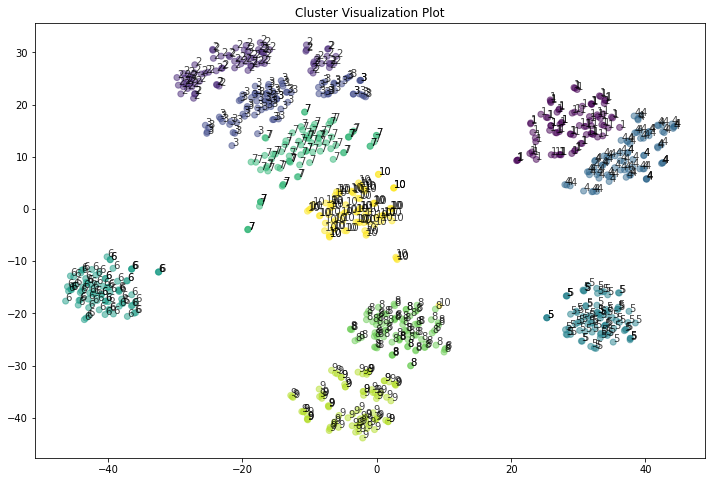

In [97]:
plt.figure(figsize = (12, 8))
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c = folderNameTrain, alpha = .5)
for x, y, label in zip(xs, ys, folderNameTrain):
  plt.annotate(label, (x, y), fontsize = 10, alpha = .75)
plt.title("Cluster Visualization Plot")
plt.savefig("clusterPlot.jpg", dpi = 500)
plt.show()

<Figure size 432x288 with 0 Axes>